# Review of Problem #1

## (b)

Support Vector Classification:
SV index 1, Dual Coeff: 1.0: Within margin boundaries, margin = 0.4617659428490217
SV index 2, Dual Coeff: 1.0: Within margin boundaries, margin = 0.400821977825526
SV index 6, Dual Coeff: 1.0: Misclassified, margin = -1.185166215207002
SV index 8, Dual Coeff: 0.009763811486659599: On the margin, margin = 0.9999704461632797
SV index 33, Dual Coeff: 1.0: Within margin boundaries, margin = 0.7590617825320783
SV index 41, Dual Coeff: 1.0: Within margin boundaries, margin = 0.39206544243257246
SV index 12, Dual Coeff: 1.0: Within margin boundaries, margin = 0.849783518851887
SV index 15, Dual Coeff: 0.9408008111733487: On the margin, margin = 0.9999410908623376
SV index 20, Dual Coeff: 0.06896300031331072: On the margin, margin = 1.0000296508646287
SV index 23, Dual Coeff: 1.0: Within margin boundaries, margin = 0.933864898623814
SV index 29, Dual Coeff: 1.0: Within margin boundaries, margin = 0.9877147365815448
SV index 46, Dual Coeff: 1.0: Within margin bou

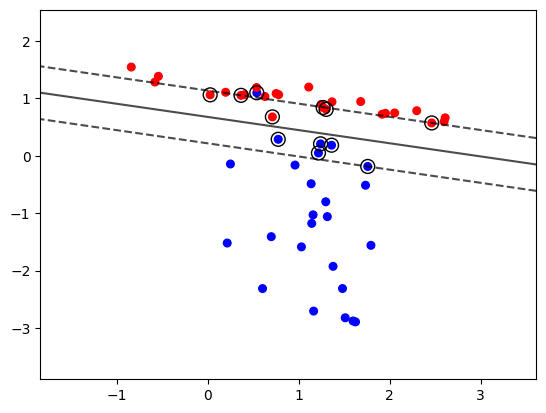

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Generate data
X, y = datasets.make_classification(
    n_samples=50, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, class_sep=1.0, random_state=42
)

# Soft-margin SVM
C = 1.0
clf = SVC(kernel="linear", C=C)
clf.fit(X, y)

# Get support vectors and indices
support_vectors = clf.support_vectors_ # ndarray of shape (n_SV, n_features)
dual_coefs = clf.dual_coef_[0] # Dual coefficients of the support vector
support_indices = clf.support_ # Indices of Support Vectors: (n_SV)

# Function to classify type of support vector
def classify_sv(x, y_true, coef, intercept, alpha, C):
    margin = y_true * (np.dot(coef, x) + intercept)
    if 0 < abs(alpha) < C:
        return f"On the margin, margin = {margin}"
    elif abs(alpha) == C:
        if margin < 1:  # Inside margin or misclassified
            if margin <= 0:
                return f"Misclassified, margin = {margin}"
            else:
                return f"Within margin boundaries, margin = {margin}"
    return "Error (shouldn't happen)"

# Print classification for each support vector
w = clf.coef_[0]
b = clf.intercept_[0]

print("Support Vector Classification:")
for idx, sv, alpha in zip(support_indices, support_vectors, dual_coefs):
    label = y[idx]
    category = classify_sv(sv, 1 if label == 1 else -1, w, b, alpha, C)
    print(f"SV index {idx}, Dual Coeff: {np.abs(alpha)}: {category}")

# Optional: plot decision boundary and support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, s=30)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            s=100, facecolors='none', edgecolors='k')

# Decision boundary
xx = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 50)
yy = np.linspace(X[:,1].min()-1, X[:,1].max()+1, 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

plt.contour(XX, YY, Z, colors='k',
            levels=[-1, 0, 1], alpha=0.7,
            linestyles=['--', '-', '--'])
plt.show()
